# Practical: Data Analysis

In this assignment you will experiment with

- exploring the data collected from a home, a weather station around the Eindhoven area, and the Dutch government measurements regarding COVID-19, 
- building a predictive model for estimating the amount of electricity consumed at the home given the current COVID-19 restrictions and weather forecast.

This notebook will guide you through the typical steps that such work would involve. It demonstrates how to explore and clean the data, and how to use it to train predictive models.

#### Goal

Your task is to train a model on the time series data containing:

- measurements of the amount of electricity produced by the solar panels on the roof of a home in the Eindhoven area,
- measurements of the amount of electricity consumed by the same house,
- weather measurements around the Eindhoven airport,
- Dutch government restrictions due to COVID-19

in order to predict the hourly energy consumption and production given the COVID-19 restrictions and the weather forecast for a particular hour of a particular day.

#### Jupyter notebooks

For those who are new to Jupyter notebooks, a typical notebook contains text cells (like this one) interleaved with code cells (the gray boxes). You can execute a cell by selecting it and pressing Shift+Enter. The expression in the last line in a cell is the output of that cell. Try executing the following cell.

In [1]:
def add(a, b):
    return a + b

add(1,2)

3

You can find out more about jupyter notbooks at:

- https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/
- http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb
- http://nbviewer.jupyter.org/github/jupyter/notebook/tree/master/docs/source/examples/Notebook/

#### References

The "Python Data Scinence Handbook" provides a good overview of using python for data data analysis and you are encouraged to consult it during this assignment:

- https://jakevdp.github.io/PythonDataScienceHandbook/

The "Introduction to Statistical Learning" [ISLR] (7th edition) book provides a good introduction to machine learning from the statistical perspective:

- http://faculty.marshall.usc.edu/gareth-james/ISL/

The "Dataset Shift in Machine Learning" book by Joaquin Quiñonero-Candela, Masashi Sugiyama, Anton Schwaighofer and Neil D. Lawrence provides a good overview of the problems that may arise when the test and training inputs and outputs have different distributions. You can find more information about the book at:

- https://mitpress.mit.edu/books/dataset-shift-machine-learning

#### Deliverable

Throughout this notebook you will find cells starting with `#TODO` and `#BEGIN_TODO`. Fill in all these TODO cells. The `#TODO` cells are meant to guide you (you are strongly encouraged to fill these in!), while the `#BEGIN_TODO` _answer cells_ will be graded.

- Answer cells start and end with tags, `# // BEGIN_TODO [Q0]` and `# // END_TODO [Q0]`, for example. Do not edit these tags in any way, else your answers may not be parsed by our grading system. 
- Your answers should be provided in Python code format between the tag lines, for example:
```
# // BEGIN_TODO [Q0]
q0 = 1
# // END_TODO [Q0]
```
- Do not place any other code between the tags, unless explicitly requested.
- Be careful when importing additional libraries. The code for of your answers will be evaluated automatically and we cannot guarantee that any additional libraries will be available in that environment. Please check the Momotor output on Canvas after submitting the assignment, you should be able to see if all your code executed without errors.

You are encouraged to play with the data and extend this notebook in order to obtain your answers. You may insert cells at any point in the notebook, as long as the answer cells remain unaltered. At the end, deliver the filled in `.ipynb` file.

> **IMPORTANT:** Before delivering your notebook, make sure that the cells in your notebook can be executed in sequence without errors, by executing "Restart & Run All" from the "Kernel" menu. This is also how your notebook will be evaluated.

Some exercises contain hints. Execute the following code cell to hide them by default and reveal the hints while pressing with the mouse on the "Hint" label. This will give you a chance to think for yourself before seeing a hint.

Let's get started by filling in your details in the following answer cell. Assign your names and student ids to variables `name_student1`, `id_student1`, `name_student2`, `id_student2`, e.g.:

```
# // BEGIN_TODO [Q0]
name_student1 = "John Smith"
id_student1 = "1234567"
name_student2 = "Jane Miller"
id_student2 = "7654321"
# // END_TODO [Q0]
```

In [1]:
#// BEGIN_TODO [Q0]
name_student1 = "Panagiotis Banos"
id_student1 = "1622773"
name_student2 = "Alina Vorobiova"
id_student2 = "1232883"
#// END_TODO [Q0]

### Import the relevant libraries

In this assignment we will be using mainly the following libraries:

- `pandas` for organizing the data
- `numpy` for operating on the data
- `matplotlib` for visualizing the data
- `sklearn` for training and evaluating a model on the data
- other utility libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.model_selection import *
import glob
import itertools

from IPython.display import HTML
HTML("<style>.h,.c{display:none}.t{color:#296eaa}.t:active+.h{display:block;}</style>")

### Read the data

The data resides in three files:

In [3]:
raw_energy = pd.read_csv("data/energy.csv", low_memory=False)
raw_energy.head()

,time,total_consumption,total_production,total_solar_production,solar_production
0,1483225202,13187.602,4499.785,4147.1,0
1,1483225212,13187.604,4499.785,4147.1,0
2,1483225222,13187.605,4499.785,4147.1,0
3,1483225232,13187.606,4499.785,4147.1,0
4,1483225242,13187.607,4499.785,4147.1,0


In [4]:
raw_weather = pd.read_csv("data/weather.csv")
raw_weather.head()

,time,clouds,temperature,humidity,wind direction,wind speed,visibility,air pressure
0,1483228800,3,-1.7,99.0,ZZW,3.0,197.0,1026.0
1,1483229400,3,-1.7,99.0,ZZW,3.0,195.0,1025.8
2,1483230000,3,-1.7,99.0,ZZW,3.0,271.0,1025.6
3,1483230600,3,-1.6,99.0,Z,3.0,316.0,1025.4
4,1483231200,3,-1.6,99.0,Z,3.0,334.0,1025.3


In [5]:
print(raw_weather)

              time  clouds  temperature  humidity wind direction  wind speed  \
0       1483228800       3         -1.7      99.0            ZZW         3.0   
1       1483229400       3         -1.7      99.0            ZZW         3.0   
2       1483230000       3         -1.7      99.0            ZZW         3.0   
3       1483230600       3         -1.6      99.0              Z         3.0   
4       1483231200       3         -1.6      99.0              Z         3.0   
...            ...     ...          ...       ...            ...         ...   
244152  1632389400       0         17.5      74.0             ZW         7.0   
244153  1632390000       1         18.0      71.0            WZW         7.0   
244154  1632390600       1         18.3      70.0            WZW         7.0   
244155  1632391200       1         18.7      70.0            WZW         7.0   
244156  1632391800       1         18.4      69.0            WZW         6.0   

        visibility  air pressure  
0   

In [7]:
raw_restrictions = pd.read_csv("data/restrictions.csv")
raw_restrictions.head()

,time,stringency,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns
0,1577836801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1577923201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1578009601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1578096001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1578182401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


When analysing data it is important to understand its semantics. In IoT one needs to be extra careful, especially when integrating data from various sources. The very basic information are the units of the measurements, but also the specifications of the sensors gathering the data and the processes that are being monitored. For example, in this case the specification of the solar panel installation states that it can generate max 153k Jouls per minute.  

Assume the following for the energy data:
- `time` is the UTC time, i.e. number of seconds since January 1, 1970 (midnight UTC/GMT)
- `total_consumption` is the total amount of electricity that was pulled from the grid (kWh)
- `total_production` is the total amount of electricity that was pushed into the grid (kWh)
- `solar_production` is the amount of eletricity that was produced since the last sample (Wh).
- `total_solar_production` is the total amount of electricity produced by the solar panels (kWh)

Assume the following for the weather data:
- `time` is the UTC time, i.e. number of seconds since January 1, 1970 (midnight UTC/GMT)
- `clouds` measures whether it was cloudy at the time when the sample was taken, ranging from 0-3, 0 meaning no clouds and 3 meaning very cloudy.
- `temperature` is the still temperature (C).
- `humidity` is the relative humidity in \%.
- `wind direction` given in South (Z), West (W), North (N), and (East), or a combination thereof.
- `wind speed` in m/s. 
- `visibility` in meters.
- `air pressure` in hPa.

Assume the following for the restriction data (retrieved from: https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/OxCGRT_latest.csv):
- `time` is the UTC time, i.e. number of seconds since January 1, 1970 (midnight UTC/GMT)
- `C_[measurement]` policy indicators C1 to C8 record information on containment and closure policies, such as school closures and restrictions in movement.
- `H_[measurement]` policy indicator H1 records health system public information campaign policies such as the Covid-19 testing regime or emergency investments into healthcare.
- `stringency` is an aggregation of C1-C8 and H1 policy indicators in one number between 0-100.

### Explore the data

Exploration is usually the first step in any data analysis task. Visualization is an important tool for exploring the data. It gives insights into the structure and semantics of the data and indications for how to clean it.

The `matplotlib` library provides a collection of useful plots, such as a line plot, scatter plot, histogram, scatter mattrix, etc. You can find out more about this library at 

- https://matplotlib.org/users/pyplot_tutorial.html
- https://matplotlib.org/devdocs/gallery/

The `pandas` library also contains convenient wrappers around the `matplotlib` library for visualizing data frames and series:

- https://pandas.pydata.org/pandas-docs/stable/visualization.html

Let's draw a simple plot of the energy data (note that we're only plotting a small part of the data here):

(1483225202.0, 1486897102.0, 13187.602, 13713.097)

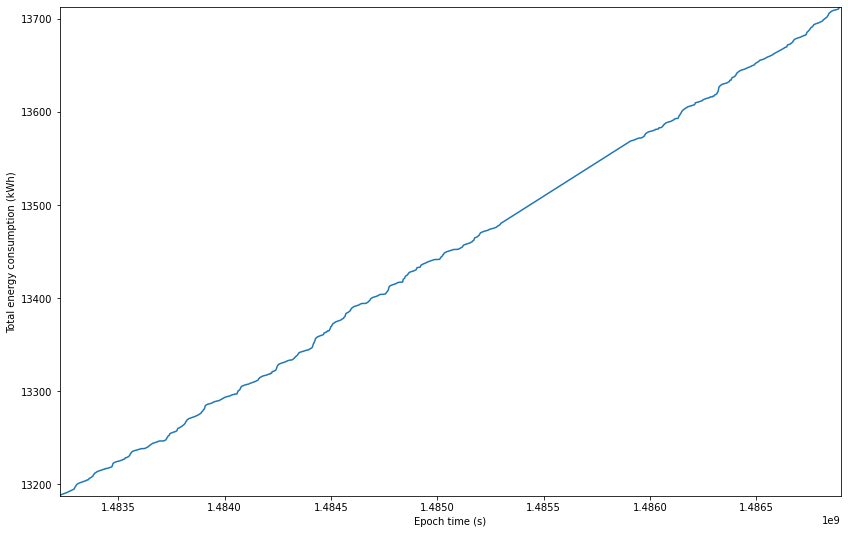

In [8]:
plt.rcParams["figure.figsize"] = (14, 9) # (w, h)
X = raw_energy[:300000]["time"]
Y = raw_energy[:300000]["total_consumption"]
plt.plot(X, Y)
plt.xlabel('Epoch time (s)')
plt.ylabel('Total energy consumption (kWh)')
plt.axis([X.min(), X.max(), Y.min(), Y.max()])

In [9]:
# TODO: explore the values in different columns (experiment with different visualizations, e.g. line, histogram, ...)

### Question 1

Simple visual inspection of the data can already tell you a lot about what you are working with. The data covers 2017, 2018, 2019, 2020 and part of 2021, but because the data was split sometime beforehand, some time ranges will be missing.

Assign to `question_missing_months` in the form of a list the months that are missing from the data (for example, if June and July of 2017 are missing, the list would be `["2017-06", "2017-07"]`). 

Not only are there months missing, each month that is in the data has some missing days as well. Assign to `question_num_missing_days` the number of days that are missing **from each month of 2019** in the form of a list of integers, starting from January, e.g. `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]` 

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
You will have to convert the timestamps in the data to retrieve the months and days. Note that the Netherlands is in timezone UTC+1.
</span>

In [10]:
raw_energy['time'] = pd.to_datetime(raw_energy['time'], unit='s') #Convert from unix time to utc
raw_energy['time'] = raw_energy.time.dt.tz_localize('utc').dt.tz_convert('Europe/Amsterdam') #Convert to local time
raw_energy['time'].tail()


10721029   2021-09-22 17:59:41+02:00
10721030   2021-09-22 17:59:51+02:00
10721031   2021-09-22 18:00:01+02:00
10721032   2021-09-22 18:00:11+02:00
10721033   2021-09-22 18:00:21+02:00
Name: time, dtype: datetime64[ns, Europe/Amsterdam]

In [11]:
months = set(raw_energy['time'].dt.month.to_list())
years = raw_energy['time'].dt.year

In [12]:
print(months)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [10]:
raw_energy['year'] = raw_energy['time'].dt.year
raw_energy['month'] = raw_energy['time'].dt.month
raw_energy['day'] = raw_energy['time'].dt.day

q1 = raw_energy.copy()

q1['month'] = raw_energy['time'].dt.strftime('%m') #testing if the string conversion messes the columns and as a result also messes the merging step

print(raw_energy['month'].unique())

possible_combinations = []
for year in raw_energy['year'].unique():
    for month in q1['month'].unique():
        if (int(month)>9) & (int(year) == 2021): #Data stops after September 2021 so we need to break the loop
            break
        possible_combinations.append(str(year) + '-' + month)
        
# print(possible_combinations)

[ 1  2  3  4  5  6  7  9 10 11 12  8]


In [11]:
q1['Y&M'] = raw_energy['time'].apply(lambda x: x.strftime('%Y-%m'))
unique_months = [q1['Y&M'].unique()]
unique_months

[array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
        '2017-07', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
        '2018-02', '2018-03', '2018-04', '2018-05', '2018-07', '2018-09',
        '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03',
        '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
        '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
        '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
        '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
        '2021-05', '2021-06', '2021-07', '2021-08', '2021-09'],
       dtype=object)]

In [ ]:
#I tried to make an alternative way for answering q1 because currently it works but its kinda heavy. The idea is to extract unique tuples of 
#year-month and compare the sequence of pairs. So if a month is missing [2018-05] - [2018-07] we can easily find it. It will be MUCH MUCH MUCH faster than
#the current solution but my tuple knowledge is a bit rusty so I left it as is and moved to the next questions. Might check it again later

def splitter_func(unique_months: list) -> list: 
    list_of_tuples = []
    for date in unique_months:
        list_of_tuples.append(tuple(int(x) for x in date.split('-')))
        
    return list_of_tuples


splitter_func(unique_months[0])

In [12]:
#finding the missing days for 2019

year2019 = raw_energy[(raw_energy['time'] >= '2019-01-01') & (raw_energy['time'] <= '2019-12-31')] #Filter the data for year 2019
year2019['time'] = raw_energy['time'].apply(lambda x: x.strftime('%Y-%m-%d')) # Keep only Y/m/d. This might be stupid because we also convert to string which will be 
                                                                              # re-converted again later to datetime, but I didnt find another way 
                                                                              # to remove hours and mins and secs.
year2019 = year2019.set_index('time') #Re-index
year2019.index = pd.to_datetime(year2019.index) #Convert string back to datetime. th

diff = pd.date_range(start='2019-01-01', end='2019-12-31').difference(year2019.index.unique()); #Create a date range and compare with year2019 to find missing days 

<ipython-input-12-495e1e8002b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2019['time'] = raw_energy['time'].apply(lambda x: x.strftime('%Y-%m-%d')) # Keep only Y/m/d. This might be stupid because we also convert to string which will be


In [13]:
#// BEGIN_TODO [Q1]
question_missing_months = [x for x in possible_combinations if x not in unique_months[0]] #compare the months in the dataset w/ the list of all possible combinations
print(question_missing_months)

question_num_missing_days = [diff.day.groupby(diff.month)]
print(question_num_missing_days)
#// END_TODO [Q1]

['2017-08', '2018-06', '2018-08', '2020-04']
[{1: [26, 27, 28, 29, 30, 31], 2: [24, 25, 26, 27, 28], 3: [27, 28, 29, 30, 31], 4: [26, 27, 28, 29, 30], 5: [27, 28, 29, 30, 31], 6: [1, 2, 3, 16, 28, 29, 30], 7: [10, 11, 12, 13, 14, 15, 16, 17, 27, 28, 29, 30, 31], 8: [26, 27, 28, 29, 30], 9: [26, 27, 28, 29, 30], 10: [28, 29, 30, 31], 11: [26, 27, 28, 29, 30], 12: [26, 27, 28, 29, 30, 31]}]


### Clean the data

Data cleaning is an important part of any data analysis task. According to the general wisdom, most effort actually is spent on data cleaning. It involves preparing the data for the following steps, e.g. converting values to the right type, filling in missing values, removing outliers, normalizing the data, etc.

In the plot above you may have noticed vertical lines (you may have to plot a shorter time range to spot them). These lines correspond to 0 values and are likely to be measurement errors (e.g. the solar panel meter has crashed). Such outliers will often negatively impact the accuracy of the predictive model. However, care must be taken to properly define what constitutes an outlier and what constitutes a valid measurement. Some odd looking measurements may actually contain important evidence for proving or disproving a hypothesis. In this case the 0 values can be considered measurement errors and should be removed.

Pandas provides convenient methods for selecting subsets of the data that can be used for removing outliers:

- https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html

Data that is collected in the wild will sometimes contain formatting inconsistencies. It is a good habit to check the data types:

In [11]:
raw_energy.dtypes

time                      datetime64[ns, Europe/Amsterdam]
total_consumption                                  float64
total_production                                   float64
total_solar_production                             float64
solar_production                                    object
dtype: object

In [12]:
raw_energy.shape

(10721034, 5)

As expected, the `'total_consumption'`, `'total_production'`, `'total_solar_production'` columns are of numerical type, however, the `solar_production` is of an `object` type (which is also used for strings), while looking at the specification of the column above we would expect a numerical type. Modeling this column later will require a numerical column, so it will need to be converted to the right type first.

In [13]:
# TODO: explore the offending values in the solar_production column
raw_energy[pd.to_numeric(raw_energy.solar_production, errors='coerce').isnull()]

,time,total_consumption,total_production,total_solar_production,solar_production
506447,2017-03-14 09:49:58+01:00,14020.109,4652.388,0.0,
506448,2017-03-14 09:49:58+01:00,14020.109,4652.385,0.0,
506449,2017-03-14 09:49:58+01:00,14020.109,4652.382,0.0,
506450,2017-03-14 09:49:58+01:00,14020.109,4652.378,0.0,
506451,2017-03-14 09:49:58+01:00,14020.109,4652.375,0.0,
...,...,...,...,...,...
10467447,2021-07-17 23:45:42+02:00,30134.326,11980.818,NaN,
10467448,2021-07-17 23:45:52+02:00,30134.327,11980.818,NaN,
10467449,2021-07-17 23:46:02+02:00,30134.328,11980.818,NaN,
10467450,2021-07-17 23:46:12+02:00,30134.328,11980.818,NaN,


### Question 2

Convert empty strings in the `'solar_production'` column to `np.nan`. Convert the remaining values in the `'solar_production'` column to `float` type, and copy the resulting column to a variable named `solar_production_column`.

In [14]:
#// BEGIN_TODO [Q2]
raw_energy['solar_production'].replace(r'^\s*$', np.nan, regex=True)
raw_energy['solar_production'] = pd.to_numeric(raw_energy['solar_production'], errors='coerce')
solar_production_column = raw_energy['solar_production']

#// END_TODO [Q2]

In [15]:
solar_production_column

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
            ...  
10721029    171.0
10721030    171.0
10721031    171.0
10721032    171.0
10721033    171.0
Name: solar_production, Length: 10721034, dtype: float64

In addition, there are often errors in our data due to sensor measurements errors. In this case, in the `'total_solar_production'` column those errors are shown as `0.0` values. We have to remove the error values from the `'total_solar_production'` column.

In [16]:
raw_energy = raw_energy[raw_energy['total_solar_production'] != 0.0]

After removing those vaules, the index of a data frame might need to be recomputed, to reflect the new ordering of rows.

In [17]:
raw_energy = raw_energy.reset_index()
raw_energy.shape

(10716518, 6)

### Engineer features

The goal of this assignment is to predict the home hourly energy consumption and energy output of the solar panels given the restriction and weather data. This requires to relate the energy samples with the restriction and weather samples, basically attaching the total energy consumption and production labels to the restriction and weather measurements. However, for the *total* energy production, restriction and weather samples are taken approximately every 1 seconds, 1 day and 10 minutes, respectively.

####  Aggregate per hour

We can use pandas grouping functions to aggregate the energy samples per hour, taking the largest  measurement in that hour.

In [18]:
col = "total_consumption"
energy = raw_energy.copy()
times = pd.to_datetime(energy["time"], unit='s')

energy = energy.groupby([times.dt.year, times.dt.month, times.dt.dayofyear, times.dt.hour])[[col]].agg(np.max)
energy.index.names = ["year", "month", "day", "hour"]
print(energy.shape)

(29757, 1)


### Question 3 ###

Note that the hourly aggregation using the maximum works well for columns containing the totals. Is this method also applicable for the `'solar_production'` column? If yes, does it require any modifications? If no, why? Assign the explanation to the variable `question_aggregation`, with no more than 80 words.

In [19]:
#// BEGIN_TODO [Q3]
#// END_TODO [Q3]

After aggregation, some cells can contain `Nan` values (e.g. when trying to compute a maximum for an hour during which no samples were recorded). Therefore, after performing such operations one should decide what to do with any NaN values. In this case we chose to remove such samples.

In [20]:
energy = energy.dropna()

After grouping, merging and slicing operations, the index of a data frame might need to be recomputed, to reflect the new ordering of rows.

In [21]:
energy = energy.reset_index()

#### Compute the hourly consumption

We are interested in predicting the energy consumption in a given hour. However, the `'total_consumption'` column in the energy data frame at this point contains the total consumption until the end of that hour. Assuming that the dataset contains a sample for every hour, i.e. there are no gaps, the hourly consumption can be compouted by taking the difference between the previous sample.

In [22]:
col = "total_consumption"
energy["consumption"] = energy[col] - energy[col].shift(1)
energy = energy.dropna().reset_index()
print(energy.shape)

(29756, 7)


In [23]:
energy.dtypes

index                  int64
year                   int64
month                  int64
day                    int64
hour                   int64
total_consumption    float64
consumption          float64
dtype: object

In [24]:
print(energy.head())
print(energy.tail())
print(energy.loc[energy['year'] == 2020 | 2021])

   index  year  month  day  hour  total_consumption  consumption
0      1  2017      1    1     1          13188.774        0.475
1      2  2017      1    1     2          13189.207        0.433
2      3  2017      1    1     3          13189.513        0.306
3      4  2017      1    1     4          13189.779        0.266
4      5  2017      1    1     5          13190.117        0.338
       index  year  month  day  hour  total_consumption  consumption
29751  29752  2021      9  265    14          30554.280        0.029
29752  29753  2021      9  265    15          30554.314        0.034
29753  29754  2021      9  265    16          30554.334        0.020
29754  29755  2021      9  265    17          30554.346        0.012
29755  29756  2021      9  265    18          30554.346        0.000
       index  year  month  day  hour  total_consumption  consumption
25186  25187  2021      1    1     0          28308.965        0.837
25187  25188  2021      1    1     1          28309.624   

### Question 4

The COVID-19 restrictions are sampled once per day. To combine them with the hourly energy consumption, we need to transform the restrictions data to contain one sample per hour. Assuming that a given restriction is valid throughout the day, up-sample the `raw_restrictions` data to contain one row per hour in the day. Assign the up-sampled data frame to the variable `restrictions`.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
You can use pandas `resample()` function to produce measurements per hour.
</span>

In [25]:
raw_restrictions['time'] = pd.to_datetime(raw_restrictions['time'], unit='s') #Convert from unix time to utc
raw_restrictions['time'] = raw_restrictions.time.dt.tz_localize('utc').dt.tz_convert('Europe/Amsterdam') #Convert to local time
test_raw_restrictions = raw_restrictions.copy()
test_raw_restrictions['time'] = pd.to_datetime(test_raw_restrictions['time'])

test_raw_restrictions = test_raw_restrictions.set_index('time') #Datetime-like type of data has to be the index if we want to resample the timeseries

resampled_raw_restrictions = test_raw_restrictions.resample('1H').ffill() #Do the oversampling ( 1H is the interval, i.e. we generate one extra sample per hour


In [26]:
#// BEGIN_TODO [Q4]
# raw_restrictions['time'] = pd.to_datetime(raw_restrictions['time'], unit='s') #Convert from unix time to utc
# raw_restrictions['time'] = raw_restrictions.time.dt.tz_localize('utc').dt.tz_convert('Europe/Amsterdam') #Convert to local time
# test_raw_restrictions = raw_restrictions.copy()
# test_raw_restrictions['time'] = pd.to_datetime(test_raw_restrictions['time'])

# test_raw_restrictions = test_raw_restrictions.set_index('time') #Datetime-like type of data has to be the index if we want to resample the timeseries

# resampled_raw_restrictions = test_raw_restrictions.resample('1H').ffill() #Do the oversampling ( 1H is the interval, i.e. we generate one extra sample per hour

restrictions = resampled_raw_restrictions.copy() #Needed for the next cells

restrictions = restrictions.reset_index()

print('Number of rows when upsampled: {0} and original number of rows: {1}'.format(restrictions.shape[0], raw_restrictions.shape[0]))
#// END_TODO [Q4]

Number of rows when upsampled: 15481 and original number of rows: 514


#### Merge the data frames

Now that both data frames are expressed in terms of hours and the energy data frame contains the hourly consumption, we can use pandas to merge them. 

> **IMPORTANT:** when dealing with times in data from various sources one must be very carefull about the semantics of the time, such as the time-zone or the daylight-saving. Luckily, in this assignment both energy and restriction data use UTC time, so no extra preprocessing is required.

For the restriction data to be able to merge with the energy data, let us first convert the time column into year, month, day and hour columns:

In [27]:
times = pd.to_datetime(restrictions["time"], unit='s')
restrictions['year']  = times.dt.year
restrictions['month'] = times.dt.month
restrictions['day']   = times.dt.dayofyear
restrictions['hour']  = times.dt.hour
restrictions = restrictions.drop('time', axis=1)

In [28]:
restrictions.head()

,stringency,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,year,month,day,hour
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,1,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,1,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,1,5


We can now use pandas to do the merge:

In [29]:
data = pd.merge(energy, restrictions).dropna().reset_index(drop=True)
data = data.drop('index', axis=1) # Normally, this line shouldnt be here, I'm just testing
print(data.head())
print(data.shape)

   year  month  day  hour  total_consumption  consumption  stringency  \
0  2020      1    1     2          24589.787        0.399         0.0   
1  2020      1    1     3          24590.107        0.320         0.0   
2  2020      1    1     4          24590.311        0.204         0.0   
3  2020      1    1     5          24590.651        0.340         0.0   
4  2020      1    1     6          24591.265        0.614         0.0   

   C1_School closing  C2_Workplace closing  C3_Cancel public events  \
0                0.0                   0.0                      0.0   
1                0.0                   0.0                      0.0   
2                0.0                   0.0                      0.0   
3                0.0                   0.0                      0.0   
4                0.0                   0.0                      0.0   

   C4_Restrictions on gatherings  C5_Close public transport  \
0                            0.0                        0.0   
1       

In [30]:
print('Number of rows when merging energy and restrictions {0}'.format(data.shape[0]))

Number of rows when merging energy and restrictions 10982


#### Explore the engineered features

After engineering features it is a good idea to explore the dataset again, to see if extra cleaning is required.

0.0 289.4279999999999


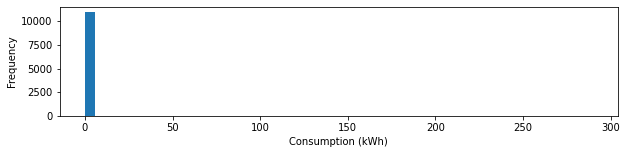

In [31]:
values = data["consumption"].values
plt.figure(figsize=(10, 2))
plt.hist(values, 50);
plt.xlabel('Consumption (kWh)')
plt.ylabel('Frequency')
print (min(values), max(values))

The small variance of the values and their large range suggests there are some outliers. This can be also visualized in a different way.

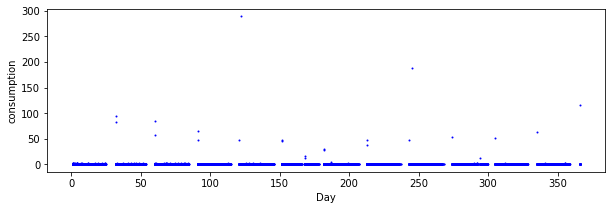

In [32]:
def plot(df, col):
    x = df["day"]
    plt.figure(figsize=(10,3))
    plt.plot(x, df[col], 'bo', markersize=1)
    plt.xlabel('Day')
    plt.ylabel(col)    
plot(data, "consumption")

The figure suggests that there are indeed outliers in the energy consumption data.

### Question 5

The plot shows some outliers. How do you explain these? Note that there may be more than one correct anwser.

1. There is actually an oversight in the previous calculations which causes the outliers.
2. There is some unclean data present due to sensor errors.
3. There were some very high consumption days due to certain events, e.g. Christmas Eve.
4. The outliers represent multiple days of consumption.

Assign the integer(s) corresponding to the correct answer(s) as a list to the variable `question_outliers`.

0        0.399
1        0.320
2        0.204
3        0.340
4        0.614
         ...  
10977    0.029
10978    0.034
10979    0.020
10980    0.012
10981    0.000
Name: consumption, Length: 10982, dtype: float64


(1.0, 366.0, 0.0, 289.4279999999999)

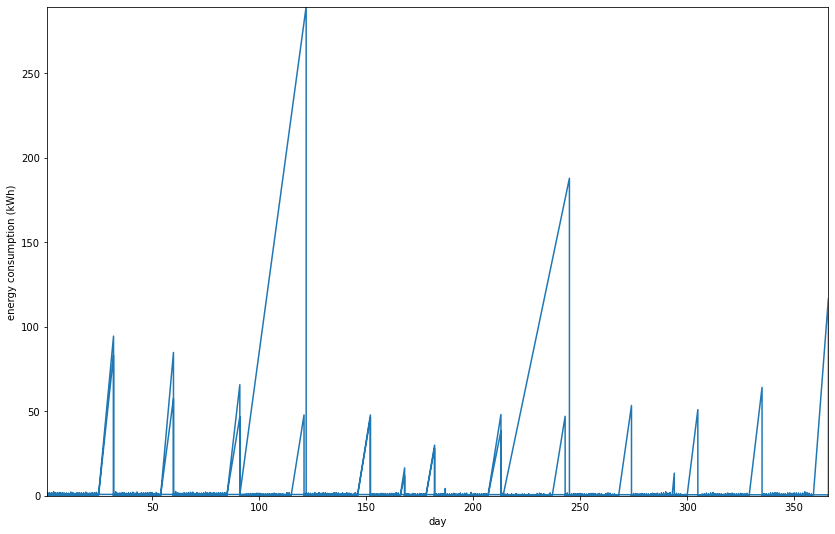

In [33]:
print(data['consumption'])

plt.rcParams["figure.figsize"] = (14, 9) # (w, h)
X = data["day"]
Y = data["consumption"]
plt.plot(X, Y)
plt.xlabel('day')
plt.ylabel('energy consumption (kWh)')
plt.axis([X.min(), X.max(), Y.min(), Y.max()])

In [34]:
data.sort_values(by='consumption', ascending=False)[:20]

,year,month,day,hour,total_consumption,consumption,stringency,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns
1725,2020,5,122,0,26028.527,289.428,78.70,3.0,2.0,2.0,4.0,1.0,2.0,1.0,3.0,2.0
10505,2021,9,245,22,30417.203,187.860,41.67,1.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0
6389,2020,12,366,1,28292.921,116.855,78.70,3.0,3.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0
575,2020,2,32,1,25013.760,94.469,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1103,2020,2,60,1,25367.536,84.801,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6989,2021,2,32,1,28736.747,83.248,82.41,3.0,3.0,2.0,4.0,1.0,2.0,1.0,3.0,2.0
1703,2020,3,91,2,25729.538,65.711,78.70,3.0,2.0,2.0,4.0,1.0,2.0,1.0,3.0,2.0
5813,2020,11,335,1,27829.244,64.132,56.48,1.0,2.0,2.0,4.0,0.0,1.0,0.0,3.0,2.0
7517,2021,3,60,1,29033.341,57.635,78.70,2.0,3.0,2.0,4.0,1.0,2.0,1.0,3.0,2.0
4637,2020,9,274,2,27192.069,53.434,48.15,1.0,2.0,1.0,4.0,0.0,1.0,0.0,3.0,2.0


<AxesSubplot:ylabel='Density'>

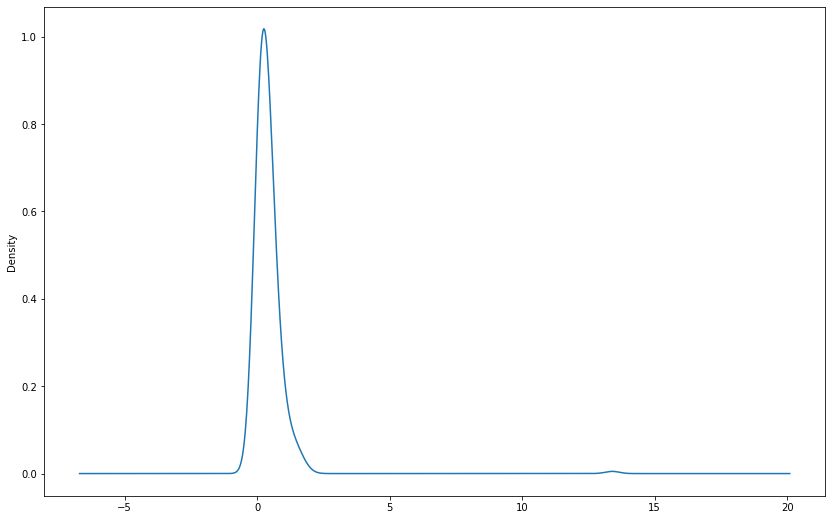

In [35]:
data['consumption'].sample(300).plot.density() #checking the distribution of a sample

In [36]:
data['time'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']], errors='coerce')
data.sort_values(by='consumption', ascending=False)[:30]

,year,month,day,hour,total_consumption,consumption,stringency,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,time
1725,2020,5,122,0,26028.527,289.428,78.70,3.0,2.0,2.0,4.0,1.0,2.0,1.0,3.0,2.0,2020-06-22 00:00:00
10505,2021,9,245,22,30417.203,187.860,41.67,1.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,NaT
6389,2020,12,366,1,28292.921,116.855,78.70,3.0,3.0,2.0,4.0,1.0,1.0,1.0,3.0,2.0,NaT
575,2020,2,32,1,25013.760,94.469,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT
1103,2020,2,60,1,25367.536,84.801,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT
6989,2021,2,32,1,28736.747,83.248,82.41,3.0,3.0,2.0,4.0,1.0,2.0,1.0,3.0,2.0,NaT
1703,2020,3,91,2,25729.538,65.711,78.70,3.0,2.0,2.0,4.0,1.0,2.0,1.0,3.0,2.0,NaT
5813,2020,11,335,1,27829.244,64.132,56.48,1.0,2.0,2.0,4.0,0.0,1.0,0.0,3.0,2.0,NaT
7517,2021,3,60,1,29033.341,57.635,78.70,2.0,3.0,2.0,4.0,1.0,2.0,1.0,3.0,2.0,NaT
4637,2020,9,274,2,27192.069,53.434,48.15,1.0,2.0,1.0,4.0,0.0,1.0,0.0,3.0,2.0,NaT


In [37]:
"""
I think the correct answers should be 
2. There is some unclean data present due to sensor errors.
4. The outliers represent multiple days of consumption.
I haven't checked it extremely thoroughly, but if we combine the information from the missing days from q1 and the days we see in the data I show above, it seems that
for lots of months the last 5-6 days go without any measurements and then sudden increases in consumption appear on the 0-th hour of a new day. Also the spikes appear
in intervals of ~30 days. 

We should discuss it a bit more to be certain anyway :)
"""

"\nI think the correct answers should be \n2. There is some unclean data present due to sensor errors.\n4. The outliers represent multiple days of consumption.\nI haven't checked it extremely thoroughly, but if we combine the information from the missing days from q1 and the days we see in the data I show above, it seems that\nfor lots of months the last 5-6 days go without any measurements and then sudden increases in consumption appear on the 0-th hour of a new day. Also the spikes appear\nin intervals of ~30 days. \n\nWe should discuss it a bit more to be certain anyway :)\n"

In [38]:
#// BEGIN_TODO [Q5]
question_outliers=[2, 4]
#// END_TODO [Q5]

Note that when removing the energy samples containing 0 values in `raw_energy` earlier, it was clear how to define an outlier. In this case, however, one must carefully decide how to define an outlier, to avoid introducing bias. You can read more about outlier detection here:

- Section 3.3.3 of "Introduction to Statistical Learning"
- http://scikit-learn.org/stable/modules/outlier_detection.html

### Question 6

There are also some outliers in the consumption column of the dataset. How do you best define an outlier, when considering this dataset?

1. Calculate the average consumption, and define an outlier based on standard deviations.
2. Build a model for the expected consumption, and label outliers based on the model predictions.
3. Set a fixed threshold for outliers based on the characteristics of the correspoinding feature, e.g. energy consumption of households in the Netherlands.
4. Estimate a fixed threshold for outliers by hand based on the above plot.

Assign an integer corresponding to the correct answer to variable `question_outlier_definition`.

<AxesSubplot:ylabel='Frequency'>

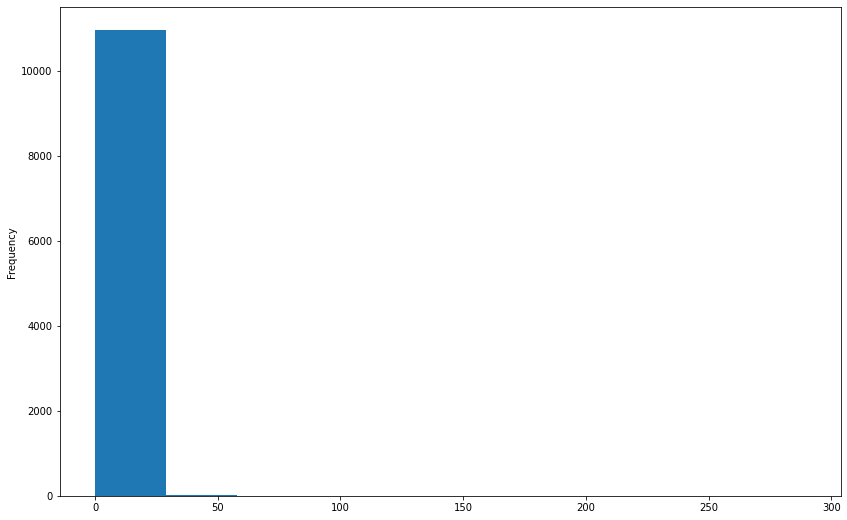

In [39]:
data['consumption'].plot.hist(bins=10)

In [40]:
#// BEGIN_TODO [Q6]
#// END_TODO [Q6]

### Question 7

Remove the outliers from the `data` data frame.

In [41]:
#// BEGIN_TODO [Q7]

#IDEA 1
# outliers are the data points that fall outside of 1.5 times of the inter quartile range (Q3 - Q1). 
# So + and - 1.5*IQR means we are considering data within the constraints

# This type of outlier removal could be a bit too harsh, as I've effectively purged a number of data points that could actually be valid
# and have actual real life reasons for them being that high (events that happened in that house that day, e.g. oven, dishwasher, dryer running at the same time 
# and things like that

# Q1 = data['consumption'].quantile(0.25)
# Q3 = data['consumption'].quantile(0.75)
# IQR = Q3 - Q1
# data = data[data['consumption'].between(data['consumption'].quantile(.25) - 1.5 * IQR, data['consumption'].quantile(.75) + 1.5 * IQR)] 
# data['consumption']


#IDEA 2
#Continuing from the findings of cell 32, we can see that most huge values appear on hour = 1 i.e. they contain the accumulated data from previous days or have sensor errors. Also we 
#can see that big consumption values start from 11 kHw. So maybe we can remove all rows where these two conditions exist (hour = 1 and consumption > 10) 

data = data.reset_index(drop=True)

grouped_by_hour = data.groupby('hour')['consumption'].mean()

# cleaned_data = data.loc[~((data['consumption'] > 10) & (data['hour'] == 1)),:]
# cleaned_data = data.drop(data[(data['consumption'] > 10.0) & (data['hour'] == 1)].index)
# cleaned_data = data.query('hour == 1 and consumption > 10')
cleaned_data = data[data['consumption'] < 10]
# cleaned_data = cleaned_data.reset_index()
# cleaned_data = cleaned_data.drop('index', axis=1)
cleaned_data.sort_values(by='consumption', ascending=False)[:30]
data = cleaned_data.copy()
print('Number of rows after the removal of outliers {0}'.format(data.shape[0]))
#// END_TODO [Q7]

Number of rows after the removal of outliers 10959


Data visualization is often helpful to check if the results of our data processing and analysis meet our expectations.

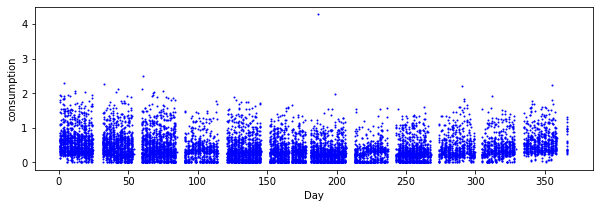

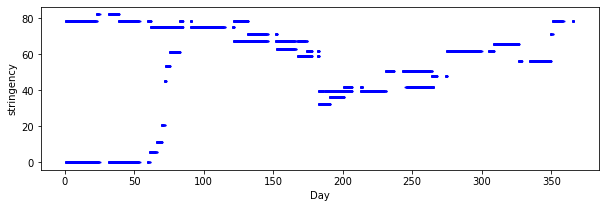

In [42]:
# TODO: plot the consumption and stringency feature
plot(data, "consumption")
plot(data, "stringency")

### Train a model

For training and evaluating the perfromance of a model we need to split the data into a training and a test.

In [43]:
X = data[["stringency"]].values
y = data["consumption"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Evaluate the model

After a model is trained we would like to estimate how well it is performing, whether we can actually trust its predictions if it were deployed. Model performance can be estimated using various visualisations and statistics (see Section 3.1.3 of [ISLR])

#### Model fit

If the feature space is 1 or 2 dimensional, then we can easily plot the model to illustrate how well it fits the test data.

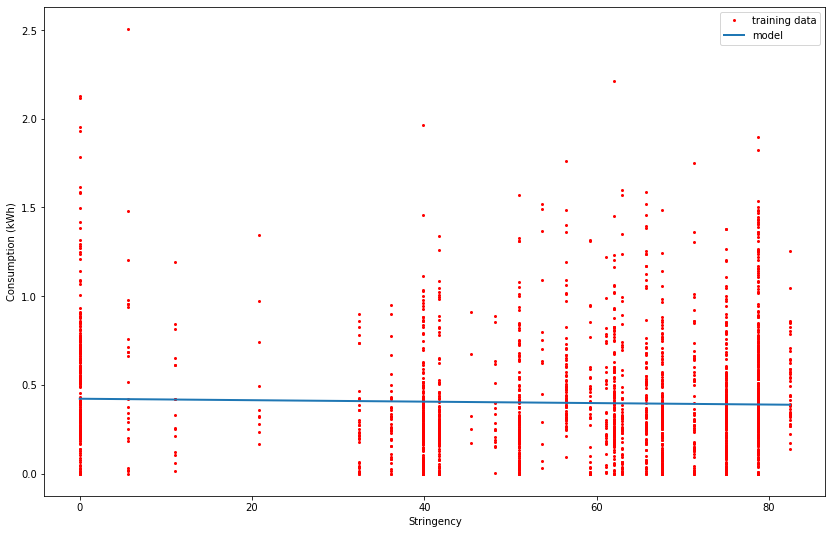

In [45]:
x_plot = np.linspace(min(X), max(X), 100)
X_plot = x_plot.reshape(-1, 1)
y_plot = model.predict(X_plot)

dots, = plt.plot(X_test, y_test, 'bo', markersize=2, color="red", label="training data");
line, = plt.plot(x_plot, y_plot, linewidth=2, label="model");
plt.xlabel('Stringency')
plt.ylabel('Consumption (kWh)')
plt.legend(handles=[dots, line]);

We can compute the R2 score to assign a number to how well the model fits the data. It estimates how much of the variance in the data is explained by the model, i.e. how well the model fits the data. A score of 1 means the model captures all of the variance, and a score of 0 means the model does not capture any of the variance.

You can read more about the R2 score in Section 3.1.3 of "Introduction to Statistical Learning".

In [46]:
model.score(X_test, y_test)

0.000520279703978388

#### Residuals

We can also plot a histogram of the residuals (or errors), i.e. the deviations of the values predicted by our model from the ground truth values (from the test set):

Text(0, 0.5, 'Frequency')

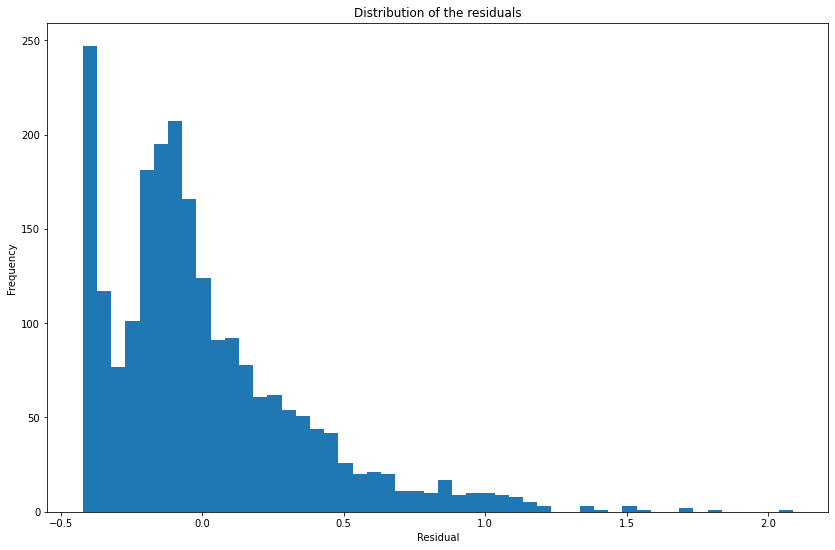

In [47]:
y_pred = model.predict(X_test)
plt.title("Distribution of the residuals")
plt.hist(y_test - y_pred, 50);
plt.xlabel('Residual')
plt.ylabel('Frequency')

Looking at the histogram you will notice that distribution of the residuals is not symmetric.

### Question 8

Does the model tend to over-estimate, or under-estimate the hourly energy consumption?

1. The model tends to under-estimate.
2. The model tends to over-estimate.
3. The model is not biased

Assign an integer corresponding to the correct answer to variable `question_bias`.

In [48]:
#// BEGIN_TODO [Q8]
question_bias = 2
#// END_TODO [Q8]

If the model is not biased, or if we are not interested in the bias, then we can compute the mean absolute deviation (MAD) to estimate the expected error of a prediction. E.g. a MAD = 0.345 means that we expect on average our predition to be off by 0.345kWh.

In [49]:
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.259167543187555

### Improve the model

We have shown here a simple linear model mapping the `stringency` feature to the `hourly_consumption` label. However, this model does not perform very well. The problem could be that the model is underfitting or overfitting the data. You can find more about under- and overfitting in Section 2.1.2, 2.1.3, 6.1 of "Introduction to Statistical Learning".

### Question 9 ###

Is the model underfitting or overfitting? What makes you say that? Investigate and then explain in at most 80 words why you think the model is underfitting or overfitting. Assign the explanation to the variable `question_fitting`.

In [48]:
#// BEGIN_TODO [Q9]
#// END_TODO [Q9]

One could try several things to improve the model.

#### Add more features

The simple linear model assumed that there is a strong relationship between the stringency (or their absence) and the energy consumption. However, `stringency` alone is not a sufficient indicator. While the `stringency` column alone may not be sufficient for predicting the solar planel output, it can be used in combination with other features. Therefore, one way of improving the simple linear model could be to extend it with more features. In our case, we have access to restriction and weather data. You can gain insight into which features could be relevant by plotting the relationship between the features and the labels.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
To utilize any of the available features, those must be expressed in the same sampling rate, i.e., one measurement per hour.
</span>

In [49]:
# TODO: use the scatter matrix graph to explore the relationship between the features

### Question 10 ###

Which features are most promising for predicting the hourly energy consumption? Select the two features that are most strongly correlated with consumption from the following list of features:

- `'year'`
- `'month'`
- `'day'`
- `'hour'`
- `'stringency'`,
- `'C1_School closing'`,
- `'C2_Workplace closing'`,
- `'C3_Cancel public events'`,
- `'C4_Restrictions on gatherings'`,
- `'C5_Close public transport'`,
- `'C6_Stay at home requirements'`,
- `'C7_Restrictions on internal movement'`,
- `'C8_International travel controls'`,
- `'H1_Public information campaigns'`,
- `'clouds'`,
- `'air pressure'`,
- `'humidity'`,
- `'visibility'`,
- `'wind speed'`,
- `'temperature'`

Assign a list of strings corresponding to the promising features to variable `question_features`.

In [50]:
weather = raw_weather.copy()
weather['time'] = pd.to_datetime(raw_weather['time'], unit='s')
weather['time'] = weather.time.dt.tz_localize('utc').dt.tz_convert('Europe/Amsterdam')
weather.dtypes
print(weather.head())
print(weather.sort_values(by='time', ascending=True))

                       time  clouds  temperature  humidity wind direction  \
0 2017-01-01 01:00:00+01:00       3         -1.7      99.0            ZZW   
1 2017-01-01 01:10:00+01:00       3         -1.7      99.0            ZZW   
2 2017-01-01 01:20:00+01:00       3         -1.7      99.0            ZZW   
3 2017-01-01 01:30:00+01:00       3         -1.6      99.0              Z   
4 2017-01-01 01:40:00+01:00       3         -1.6      99.0              Z   

   wind speed  visibility  air pressure  
0         3.0       197.0        1026.0  
1         3.0       195.0        1025.8  
2         3.0       271.0        1025.6  
3         3.0       316.0        1025.4  
4         3.0       334.0        1025.3  
                            time  clouds  temperature  humidity  \
0      2017-01-01 01:00:00+01:00       3         -1.7      99.0   
1      2017-01-01 01:10:00+01:00       3         -1.7      99.0   
2      2017-01-01 01:20:00+01:00       3         -1.7      99.0   
3      2017-01-01

In [51]:
weather = weather.groupby([times.dt.year, times.dt.month, times.dt.dayofyear, times.dt.hour]).agg({ "air pressure": np.max, "visibility": np.max, "humidity": np.max,
                                                                                                  "temperature": np.max, "wind speed": np.max, "clouds": np.max})
weather.index.names = ["year", "month", "day", "hour"]
weather = weather.dropna()
weather = weather.reset_index()
print(weather.sort_values(by='year', ascending=True))

         year  month    day  hour  air pressure  visibility  humidity  \
0      2020.0    1.0    1.0   1.0        1026.0       197.0      99.0   
5864   2020.0    9.0  245.0  10.0        1021.1      4300.0      84.0   
5863   2020.0    9.0  245.0   9.0        1021.1      4420.0      83.0   
5862   2020.0    9.0  245.0   8.0        1021.1      4360.0      83.0   
5861   2020.0    9.0  245.0   7.0        1021.0      4370.0      83.0   
...       ...    ...    ...   ...           ...         ...       ...   
11009  2021.0    4.0   93.0  20.0        1010.5      4400.0      96.0   
11008  2021.0    4.0   93.0  19.0        1010.6      4170.0      96.0   
11007  2021.0    4.0   93.0  18.0        1010.4      4830.0      97.0   
10979  2021.0    4.0   92.0  14.0        1008.8      2990.0      95.0   
15479  2021.0   10.0  280.0   2.0        1033.4     49900.0      64.0   

       temperature  wind speed  clouds  
0             -1.7         3.0       3  
5864          -0.1         3.0       3  


In [52]:
print(data.head())
print(weather.head())
print(data.shape)
print(weather.shape)
# print(weather.dtypes)

   year  month  day  hour  total_consumption  consumption  stringency  \
0  2020      1    1     2          24589.787        0.399         0.0   
1  2020      1    1     3          24590.107        0.320         0.0   
2  2020      1    1     4          24590.311        0.204         0.0   
3  2020      1    1     5          24590.651        0.340         0.0   
4  2020      1    1     6          24591.265        0.614         0.0   

   C1_School closing  C2_Workplace closing  C3_Cancel public events  \
0                0.0                   0.0                      0.0   
1                0.0                   0.0                      0.0   
2                0.0                   0.0                      0.0   
3                0.0                   0.0                      0.0   
4                0.0                   0.0                      0.0   

   C4_Restrictions on gatherings  C5_Close public transport  \
0                            0.0                        0.0   
1       

In [54]:
from scipy.stats import shapiro

def normality_test(col, df):
    
    stat, p = shapiro(df[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Attribute <<{0}>> looks Gaussian (fail to reject H0)'.format(col))
    else:
        print('Attribute <<{0}>> does not look Gaussian (reject H0)'.format(col))

In [55]:
#// BEGIN_TODO [Q10]
#If we want to be actualy correct about calculating the correlation between the variables we need to use an appropriate test for checking the correlation. The default corr() from pandas
#uses Pearson's correlation coeff. which assumes normality(i.e. data is drawn from a Gaussian distribution) for every pair of attributes that are tested. If this assumption doesnt hold
#we have to use a non-parametric test(Kendall's tau or Spearmans rank coeff.)

combined_data = pd.merge(data, weather).reset_index(drop=True)
combined_data = combined_data.drop(columns="time")
# combined_data = combined_data.dropna()
print('Number of rows after merging {0}'.format(combined_data.shape[0]))

for column in combined_data.columns:
    normality_test(column,combined_data)

q10correlations = combined_data.corr(method='spearman')['consumption']
q10correlations = q10correlations.sort_values(ascending=False)

question_features = q10correlations[1:3].index.tolist()
print("\n\n The two most correlated with consumption features are:{0}".format(question_features))
#// END_TODO [Q10]

Number of rows after merging 10959
Statistics=0.505, p=0.000
Attribute <<year>> does not look Gaussian (reject H0)
Statistics=0.947, p=0.000
Attribute <<month>> does not look Gaussian (reject H0)
Statistics=0.960, p=0.000
Attribute <<day>> does not look Gaussian (reject H0)
Statistics=0.951, p=0.000
Attribute <<hour>> does not look Gaussian (reject H0)
Statistics=0.952, p=0.000
Attribute <<total_consumption>> does not look Gaussian (reject H0)
Statistics=0.873, p=0.000
Attribute <<consumption>> does not look Gaussian (reject H0)
Statistics=0.852, p=0.000
Attribute <<stringency>> does not look Gaussian (reject H0)
Statistics=0.832, p=0.000
Attribute <<C1_School closing>> does not look Gaussian (reject H0)
Statistics=0.689, p=0.000
Attribute <<C2_Workplace closing>> does not look Gaussian (reject H0)
Statistics=0.677, p=0.000
Attribute <<C3_Cancel public events>> does not look Gaussian (reject H0)
Statistics=0.667, p=0.000
Attribute <<C4_Restrictions on gatherings>> does not look Gaussia

/Users/panos/Documents/mle_venv/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [62]:

# correlations = combined_data[combined_data.columns[1:-1]].apply(lambda x: x.corr(combined_data['consumption']))
# correlations.sort_values(ascending=False)

combined_data.sort_values(by='consumption', ascending=False)

,year,month,day,hour,total_consumption,consumption,stringency,C1_School closing,C2_Workplace closing,C3_Cancel public events,...,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,air pressure,visibility,humidity,temperature,wind speed,clouds
2994,2020,7,187,22,26582.628,4.284,39.81,1.0,2.0,0.0,...,1.0,0.0,3.0,2.0,1015.4,13000.0,83.0,2.3,3.0,3
1142,2020,3,61,18,25390.017,2.507,5.56,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1010.2,6190.0,96.0,5.4,5.0,3
90,2020,1,4,20,24652.946,2.299,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1017.9,5130.0,97.0,-1.1,4.0,3
615,2020,2,33,18,25033.588,2.267,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1040.4,26100.0,71.0,-1.8,3.0,1
6300,2020,12,355,21,28127.737,2.230,78.70,3.0,3.0,2.0,...,1.0,1.0,3.0,2.0,1001.0,39700.0,77.0,7.6,6.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,2021,6,177,14,29989.683,0.000,62.04,1.0,2.0,2.0,...,1.0,1.0,3.0,2.0,1014.2,8140.0,95.0,9.8,2.0,3
9835,2021,6,177,12,29989.681,0.000,62.04,1.0,2.0,2.0,...,1.0,1.0,3.0,2.0,1014.1,9730.0,95.0,9.8,2.0,3
9834,2021,6,177,11,29989.681,0.000,62.04,1.0,2.0,2.0,...,1.0,1.0,3.0,2.0,1014.0,9560.0,95.0,10.0,2.0,3
1711,2020,3,91,13,25733.072,0.000,78.70,3.0,2.0,2.0,...,2.0,1.0,3.0,2.0,1026.1,110.0,98.0,-1.4,1.0,3


### Question 11 ###

Using your new-found knowledge of the features, re-define the data on which you train and evaluate your model. Try to improve your model as much as possible by only changing the selection of features.

Assign your new data and new model to the variables `improved_data` and `improved_model`, respectively.

In [63]:
#// BEGIN_TODO [Q11]

print("Features sorted by correlation to consumption -> \n{0}\n\n".format(q10correlations[1:]))
improved_data = combined_data

q11_features = ["hour", "C7_Restrictions on internal movement", "wind speed", "stringency", "humidity"]

X = improved_data[q11_features].values
y = improved_data["consumption"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
improved_model = LinearRegression()
improved_model.fit(X_train, y_train)
y_pred = improved_model.predict(X_test)

mad = mean_absolute_error(y_test, y_pred)

print("R2 Score: ", improved_model.score(X_test, y_test))
print("Mean absolute error:", mad)

#// END_TODO [Q11]

Features sorted by correlation to consumption -> 
hour                                    0.328519
C3_Cancel public events                 0.081253
stringency                              0.079395
wind speed                              0.079112
C2_Workplace closing                    0.063804
humidity                                0.063180
C4_Restrictions on gatherings           0.061601
C7_Restrictions on internal movement    0.055914
clouds                                  0.053322
visibility                              0.049738
C1_School closing                       0.046692
C6_Stay at home requirements            0.012503
C5_Close public transport               0.001111
temperature                            -0.052619
year                                   -0.053873
total_consumption                      -0.099661
air pressure                           -0.107722
month                                  -0.112040
day                                    -0.114450
H1_Public informati

#### Choose a more or less flexible model

Another way is to add flexibility to the model e.g. by changing it to a polynomial model or a neural network. You can read more about simple extensions of the linear model in Section 3.3.2 and 6.2 of "Introduction to Statistical Learning".

Linear regression is far from the only modeling we can do here. Another model we could use is that of a Decision Tree. What is nice about these types of models is that they show the exact sequence of decisions that a model makes in order to arrive at a prediction. You can read more about Decision Trees at [https://scikit-learn.org/stable/modules/tree.html]. Note that in this instance, we will want to use the Decision Tree regression model, not the classification model.

In [64]:
print("Mean absolute error:", mad)

Mean absolute error: 0.23573765818595901


### Question 12

The Decision Tree model has quite a number of parameters, and we encourage you to do so to see their impact on the model's performance. One of the most important ones is that of tree depth. What happens with an increase in depth? Note that there may be more than one correct answer.

1. An increase in depth may make the model capture more of the noise in the training data.
1. An increase in depth may make the model capture less of the noise in the training data.
3. An increase in depth helps to avoid overfitting.
4. An increase in depth helps to avoid underfitting.

Assign the integer(s) corresponding to the correct answer(s) as a list to the variable `decision_tree_depth`.

In [65]:
#// BEGIN_TODO [Q12]
#// END_TODO [Q12]

### Question 13

Train a Decision Tree model an assign it to the variable `decision_tree`. Inspect it and determine what the three most influential features are according to this model. Assign the names of these features as a list of strings to the variable `decision_tree_features`. You may want to plot the resulting model to help you inspect it. 

R2 Score:  0.5430545302626044
Mean absolute error: 0.1627796222301769
['hour', 'stringency', 'humidity']


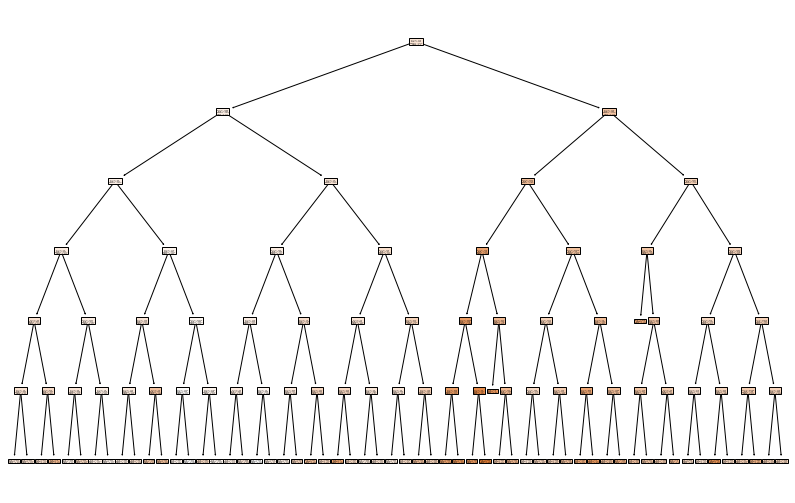

In [66]:
#// BEGIN_TODO [Q13]
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

q13_features = q11_features
X = combined_data[q13_features].values
y = combined_data["consumption"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
improved_model = tree.DecisionTreeRegressor(max_depth=6)
improved_model.fit(X_train, y_train)
y_pred = improved_model.predict(X_test)
mad = mean_absolute_error(y_test, y_pred)

print("R2 Score: ", improved_model.score(X_test, y_test))
print("Mean absolute error:", mad)

plt.figure()
tree.plot_tree(improved_model, filled=True)  
plt.savefig('tree.eps',format='eps', bbox_inches = "tight") #saves plot to file to be zoomed in

important_features = np.argsort(improved_model.feature_importances_)[::-1]

decision_tree_features = [q13_features[i] for i in important_features][:3]

print(decision_tree_features)

#// END_TODO [Q13]

In [67]:

# X = combined_data[q13_features].values
# y = combined_data["consumption"].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# improved_model = tree.DecisionTreeRegressor(max_depth=6)
# improved_model.fit(X_train, y_train)
# y_pred = improved_model.predict(X_test)
# mad = mean_absolute_error(y_test, y_pred)

# print("R2 Score: ", improved_model.score(X_test, y_test))
# print("Mean absolute error:", mad)

from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor(n_estimators=200, max_features='sqrt', bootstrap=False, random_state=42)
rfmodel.fit(X, y)
y_pred = rfmodel.predict(X_test)

mad = mean_absolute_error(y_test, y_pred)

print("Train set R2 Score: {0:.5f}".format(rfmodel.score(X, y)))
print("Test set R2 Score: {0:.5f}".format(rfmodel.score(X_test, y_test)))
print("Mean absolute error: {0:.5f}".format(mad))

Train set R2 Score: 0.95142
Test set R2 Score: 0.94879
Mean absolute error: 0.02283


In [171]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

                'max_features': max_features,

                'max_depth': max_depth,

                'min_samples_split': min_samples_split,

                'min_samples_leaf': min_samples_leaf,

                'bootstrap': bootstrap
              }

rf_random = RandomizedSearchCV(estimator = rfmodel,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X_train, y_train)

print ('Random grid: ', random_grid, '\n')
print ('Best Parameters: ', rf_random.best_params_, ' \n')

ValueError: Found input variables with inconsistent numbers of samples: [10959, 8767]

In [68]:
rfmodel2 = RandomForestRegressor(n_estimators=100, max_features='auto', bootstrap=False, max_depth=50)
rfmodel2.fit(X, y)
y_pred = rfmodel.predict(X_test)

mad = mean_absolute_error(y_test, y_pred)

print("Train set R2 Score: {0:.5f}".format(rfmodel2.score(X, y)))
print("Test set R2 Score: {0:.5f}".format(rfmodel2.score(X_test, y_test)))
print("Mean absolute error: {0:.5f}".format(mad))

Train set R2 Score: 0.95142
Test set R2 Score: 0.94879
Mean absolute error: 0.02283


In [76]:
from sklearn.neural_network import MLPRegressor

mlpmodel = MLPRegressor()
mlpmodel.fit(X,y)
y_pred = mlpmodel.predict(X_test)

mad = mean_absolute_error(y_test, y_pred)

print("Train set R2 Score: {0:.5f}".format(mlpmodel.score(X, y)))
print("Test set R2 Score: {0:.5f}".format(mlpmodel.score(X_test, y_test)))
print("Mean absolute error: {0:.5f}".format(mad))

Train set R2 Score: 0.37790
Test set R2 Score: 0.37309
Mean absolute error: 0.20158


### Simulate the forecasting

The `restriction_test.csv` file contains the restriction data that was held out from `restriction.csv` used for training the energy consumption predictor. This data simulates the restriction forecasts and is used for evaluating how your model would perform if it was deployed.

In [77]:
restrictions_test = pd.read_csv('data/restrictions_test.csv')

Provide the predictions for the hourly energy consumption for the given COVID-19 restrictions, i.e. populate the `consumption` column in the following data frame:

In [101]:
prediction = restrictions_test.copy()
prediction['time'] = pd.to_datetime(prediction['time'], unit='s').dt.tz_localize('utc').dt.tz_convert('Europe/Amsterdam')
times = prediction["time"]
# times = pd.to_datetime(prediction["time"], unit='s')
# times['time'] = times.time.dt.tz_localize('utc').dt.tz_convert('Europe/Amsterdam')

prediction['year']  = times.dt.year
prediction['month'] = times.dt.month
prediction['day']   = times.dt.dayofyear
prediction['hour']  = times.dt.hour
prediction['consumption'] = np.nan
prediction.head()

# prediction['time'] = pd.to_datetime(prediction['time'], unit='s').dt.tz_localize('utc').dt.tz_convert('Europe/Amsterdam')


,time,stringency,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,year,month,day,hour,consumption
0,2020-01-25 02:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,25,2,NaN
1,2020-01-25 03:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,25,3,NaN
2,2020-01-25 04:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,25,4,NaN
3,2020-01-25 05:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,25,5,NaN
4,2020-01-25 06:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,25,6,NaN


### Question 14

Fill in the `'consumption'` column in the prediction data frame with your predictions (do not reorder the rows). Assign the values from the `'consumption`' column as a Python list containing floats to the variable `consumption_prediction`. You may use any predictive model from the `sklearn` package (please do not use any packages that are not already included in this notebook). You can take a look through the contents of `sklearn` at [https://scikit-learn.org/stable/supervised_learning.html] to find models that suit this purpose, such as Random Forests and Multi-layer Perceptrons.

For automating the evaluation of your predictions, call the evaluate function that is defined in the `evaluate.py` script (do not edit the code lines below!):

In [102]:
weatherQ14 = raw_weather.copy()
weatherQ14['time'] = pd.to_datetime(raw_weather['time'], unit='s')
weatherQ14['time'] = weatherQ14.time.dt.tz_localize('utc').dt.tz_convert('Europe/Amsterdam')

# weat2.set_index("year", "month", "day", "hour")
# weat2 = weat2.dropna()
print(weatherQ14)
print(weatherQ14.dtypes)
print(prediction.dtypes)

                            time  clouds  temperature  humidity  \
0      2017-01-01 01:00:00+01:00       3         -1.7      99.0   
1      2017-01-01 01:10:00+01:00       3         -1.7      99.0   
2      2017-01-01 01:20:00+01:00       3         -1.7      99.0   
3      2017-01-01 01:30:00+01:00       3         -1.6      99.0   
4      2017-01-01 01:40:00+01:00       3         -1.6      99.0   
...                          ...     ...          ...       ...   
244152 2021-09-23 11:30:00+02:00       0         17.5      74.0   
244153 2021-09-23 11:40:00+02:00       1         18.0      71.0   
244154 2021-09-23 11:50:00+02:00       1         18.3      70.0   
244155 2021-09-23 12:00:00+02:00       1         18.7      70.0   
244156 2021-09-23 12:10:00+02:00       1         18.4      69.0   

       wind direction  wind speed  visibility  air pressure  
0                 ZZW         3.0       197.0        1026.0  
1                 ZZW         3.0       195.0        1025.8  
2        

In [103]:
# prediction = prediction.drop('time', axis=1)

# print(prediction)

q14_dataset = pd.merge(prediction, weatherQ14, on='time').reset_index(drop=True)
dates1 = prediction['time']
dates2 = q14_dataset['time']


print(np.setdiff1d(dates1, dates2)) #Using this I discovered that two rows failed to merge thus making the resulting dataframe 2987 rows instead of 2989 that was required for the 
                                    #sanity check. Changing merge to merge_asof fixed this, but I'm not sure how correct this is because merge_asof does approximate joints
                                    #TOP PRIORITY FOR CHECKING THIS PROBLEM HERE

# print(prediction.index)

[Timestamp('2020-01-29 13:00:00+0100', tz='Europe/Amsterdam')
 Timestamp('2020-03-26 10:00:00+0100', tz='Europe/Amsterdam')
 Timestamp('2020-05-28 02:00:00+0200', tz='Europe/Amsterdam')
 Timestamp('2020-05-29 12:00:00+0200', tz='Europe/Amsterdam')
 Timestamp('2020-05-29 13:00:00+0200', tz='Europe/Amsterdam')
 Timestamp('2020-06-15 21:00:00+0200', tz='Europe/Amsterdam')
 Timestamp('2020-07-28 13:00:00+0200', tz='Europe/Amsterdam')
 Timestamp('2020-08-25 02:00:00+0200', tz='Europe/Amsterdam')
 Timestamp('2020-08-25 04:00:00+0200', tz='Europe/Amsterdam')
 Timestamp('2020-08-28 02:00:00+0200', tz='Europe/Amsterdam')
 Timestamp('2020-09-24 07:00:00+0200', tz='Europe/Amsterdam')
 Timestamp('2020-09-24 10:00:00+0200', tz='Europe/Amsterdam')
 Timestamp('2020-09-24 11:00:00+0200', tz='Europe/Amsterdam')
 Timestamp('2020-09-25 07:00:00+0200', tz='Europe/Amsterdam')
 Timestamp('2020-09-28 08:00:00+0200', tz='Europe/Amsterdam')
 Timestamp('2020-10-29 12:00:00+0100', tz='Europe/Amsterdam')
 Timesta

In [104]:
# print(q14_dataset.head())
# print(q14_dataset.tail())
# print(q14_dataset.shape)

In [105]:
q14_dataset

,time,stringency,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,...,day,hour,consumption,clouds,temperature,humidity,wind direction,wind speed,visibility,air pressure
0,2020-01-25 02:00:00+01:00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25,2,NaN,3,1.0,96.0,ZW,2.0,2800.0,1022.9
1,2020-01-25 03:00:00+01:00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25,3,NaN,3,0.9,96.0,Z,2.0,3100.0,1022.8
2,2020-01-25 04:00:00+01:00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25,4,NaN,3,0.8,95.0,Z,2.0,4200.0,1022.3
3,2020-01-25 05:00:00+01:00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25,5,NaN,3,0.8,96.0,Z,2.0,2600.0,1022.1
4,2020-01-25 06:00:00+01:00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25,6,NaN,3,0.6,95.0,Z,2.0,2300.0,1022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021-08-01 21:00:00+02:00,41.67,1.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,...,213,21,NaN,3,16.8,90.0,W,2.0,16000.0,1011.8
2966,2021-08-01 22:00:00+02:00,41.67,1.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,...,213,22,NaN,3,16.2,83.0,NW,2.0,3300.0,1012.5
2967,2021-08-01 23:00:00+02:00,41.67,1.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,...,213,23,NaN,3,15.5,82.0,W,2.0,45000.0,1012.8
2968,2021-08-02 00:00:00+02:00,41.67,1.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,...,214,0,NaN,1,14.1,88.0,W,1.0,40000.0,1012.9


In [106]:
q13_features

['hour',
 'C7_Restrictions on internal movement',
 'wind speed',
 'stringency',
 'humidity']

In [82]:
X_train = combined_data[q13_features].values #data from previous question will be used to train the model
X_test = q14_dataset[q13_features].values #data from the prediction dataset that will be used for the "consumption" prediction

q14_model = RandomForestRegressor(n_estimators=200, max_features='sqrt', bootstrap=False, random_state=42)
q14_model.fit(X_train,y)
print("Training set R2 Score: {0:.5f}".format(q14_model.score(X_train, y)))

Training set R2 Score: 0.97210


In [83]:
print(combined_data[q13_features])
print(q14_dataset[q13_features])

       hour  C7_Restrictions on internal movement  wind speed  stringency  \
0         2                                   0.0         3.0        0.00   
1         3                                   0.0         3.0        0.00   
2         4                                   0.0         3.0        0.00   
3         5                                   0.0         3.0        0.00   
4         6                                   0.0         3.0        0.00   
...     ...                                   ...         ...         ...   
10478     9                                   0.0         2.0       41.67   
10479    10                                   0.0         2.0       41.67   
10480    11                                   0.0         2.0       41.67   
10481    12                                   0.0         1.0       41.67   
10482    13                                   0.0         1.0       41.67   

       humidity  
0          99.0  
1          99.0  
2          99.0  
3  

In [84]:
preds = q14_model.predict(X_test)

In [85]:
prediction['consumption'] = preds

In [86]:
prediction['consumption']

0       0.296420
1       0.289975
2       0.267275
3       0.310520
4       0.307260
          ...   
2984    0.460900
2985    0.465230
2986    0.367220
2987    0.628635
2988    0.854665
Name: consumption, Length: 2989, dtype: float64

In [87]:
from evaluate_stub import *
evaluate(prediction)

As a sanity check, make sure that the `prediction` data frame contains a `consumption` column and 2989 rows.

In [88]:
prediction.shape[0]

2989

<AxesSubplot:ylabel='Frequency'>

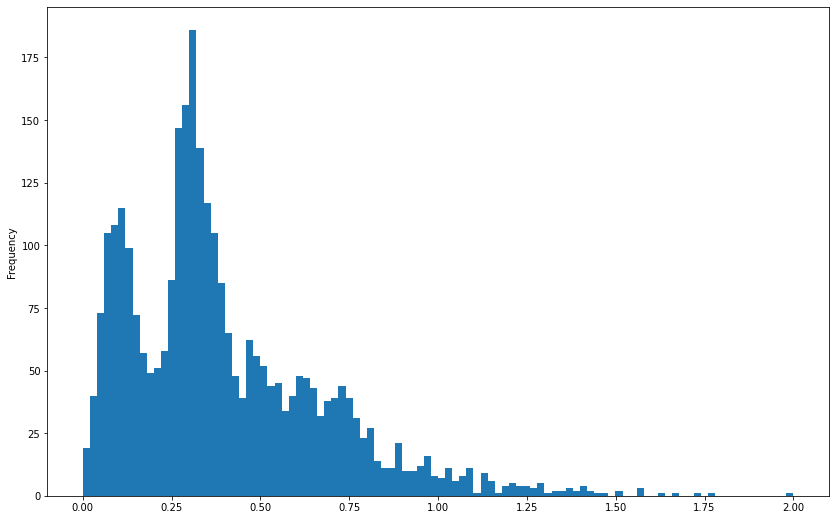

In [89]:
prediction['consumption'].plot.hist(bins=100)

Your solution will be evaluated based on the mean absolute error metric.

In [ ]:
#// BEGIN_TODO [Q14]
#// END_TODO [Q14]

> **IMPORTANT:** your model will be evaluated on the held out test set. It is therefore safe to train your *final* model on the entire dataset that was provided (rather than the X_train, y_train subsets from the train/test split above), to captures all of the information that is available to you.

### Predict hourly solar energy production 

Apart from the hourly energy consumption, we are also intrested in predicting the hourly energy production from the solar panels. For this, we use the available weather data and we will utilize the data across from the first 4 years, i.e., 2017-2020.

#### Compute the hourly production

We are interested in predicting the solar panel output in a given hour. However, the `'total_solar_production'` column in the energy data frame at this point contains the total solar panel output until the end of that hour.
Assuming that the dataset contains a sample for every hour, i.e. there are no gaps, the hourly output can be computed by taking the difference between the previous sample, similar to the `'total_consumption'` column.

In [134]:
col = "total_solar_production"
energy = raw_energy.copy()
times = pd.to_datetime(energy["time"], unit='s')
energy = energy.groupby([times.dt.year, times.dt.month, times.dt.dayofyear, times.dt.hour])[[col]].agg(np.max)
energy.index.names = ["year", "month", "day", "hour"]
energy["production"] = energy[col] - energy[col].shift(1)
energy_17to20 = energy[:25189]
energy_17to20.tail()

total_solar_production  production
year month day hour                                    
2020 12    366 21                   15446.0         0.0
               22                   15446.0         0.0
               23                   15446.0         0.0
2021 1     1   0                    15446.0         0.0
               1                    15446.0         0.0

### Question 15 ###

After creating the production column there are NaNs in the data. Where do they come from, and why is the index recomputed?

1. The NaN values are caused by missing values in the original data due to sensor errors, and the index is reset because a column has been added.
2. The NaN values are caused by missing values in the original data due to the way the column is calculated, and the index is reset because a column has been added.
3. The NaN values are caused by missing values in the original data due to sensor errors, and the index is reset because the number of rows has changed.
4. The NaN values are caused by missing values in the original data due to the way the column is calculated, and the index is reset because the number of rows has changed.

Assign the integer corresponding to the correct answer to the variable `question_production`.

In [ ]:
#// BEGIN_TODO [Q15]
#// END_TODO [Q15]

In order to continue, we need to remove these NaN values.

In [ ]:
energy_17to20 = energy_17to20.dropna().reset_index()
plot(energy_17to20, "production")

#### Merge weather and energy data

We need to merge the weather and energy production data in order to train any predictive model. 

### Question 16

Aggregate the `weather` data per hour and merge it with the `energy_17to20` data frame. Assign the resulting data frame to variable `data_production`.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
When we consider the weather data, the average value per hour is more suitable from the maximum.
</span>

In [ ]:
#// BEGIN_TODO [Q16]
#// END_TODO [Q16] 

#### Remove outlier

Similar to the outliers present in the consumption column calculated earlier from the energy data, there may be some outliers present in the production column as well. We should remove those outliers, before we train our model.

In [ ]:
# TODO: Explore the data to identify any outliers

### Question 17

Remove any outliers from the `data_production` data frame.

In [ ]:
#// BEGIN_TODO [Q17]
#// END_TODO [Q17] 

### Question 18

Now that the data has been cleaned and converted, let's take another look. Aggregate the months that are present in the training data, and determine which month of each year is on average the most productive in terms of solar production across the first 4 years (2017-2020). Assign the integer corresponding to the month of each year (start counting from 1 - January=1) to a list on the variable `most_productive_months`, i.e.  `most_productive_months = [1,2,3,4]`.

In [ ]:
# TODO: Explore data to find the most productive months per year.

In [ ]:
#// BEGIN_TODO [Q18]
#// END_TODO [Q18]

### Question 19

Train a model using the weather and energy data to predict the energy production of the solar panels. You can use the following features from the weather dataset:

- `'year'`
- `'month'`
- `'hour'`
- `'clouds'`
- `'air pressure'`
- `'humidity'`
- `'visibility'`
- `'wind speed'`
- `'temperature'`


Assign the two best-suited features to the variable `features_production` as a list, i.e. `['year','hour']`. In addition, assign the model trained on these features to the variable `model_production`.

In [ ]:
#// BEGIN_TODO [Q19]
#// END_TODO [Q19]

#### Energy consumption for 2021

Let's now look into the 2021 energy consumption data.

In [ ]:
energy_21 = energy[25189:].dropna().reset_index()
energy_21.head()

### Question 20

Check this new model's performance when predicting the energy consumption for the data from 2021. Is there a shift taking place in the data underlying the model? If so, what kind of shift do you think it is? Assign the integer corresponding to the correct answer to `question_consumption_shift`.

1. Sample covariate shift
2. Source component shift

In [ ]:
#// BEGIN_TODO [Q20]
#// END_TODO [Q20]

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [ ]:
#// BEGIN_TODO [Feedback_1]
#// END_TODO [Feedback_1]

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 1 - 10, with 1 being very easy.

In [ ]:
#// BEGIN_TODO [Feedback_2]
#// END_TODO [Feedback_2]

### Did you take the course Foundations of Data Mining?

Assign a boolean value to `feedback_foundations` (True or False).

In [ ]:
#// BEGIN_TODO [Feedback_3]
#// END_TODO [Feedback_3]

### Did you do any other Machine Learning-related coursework (university/workshop/online/etc)

Assign an answer to `feedback_other`, describing any other coursework done.

In [ ]:
#// BEGIN_TODO [Feedback_4]
#// END_TODO [Feedback_4]

### (Optional) Which parts of the assignment did you like?

Assign a string to `feedback_like`.

In [ ]:
#// BEGIN_TODO [Feedback_5]
#// END_TODO [Feedback_5]

### (Optional) Which parts of the assignment could be improved?

Assign a string to `feedback_improve`.

In [ ]:
#// BEGIN_TODO [Feedback_6]
#// END_TODO [Feedback_6]